<a href="https://colab.research.google.com/github/LucilleKaleha/Moringa_Data_Science_W6_IP_2019_08/blob/master/Moringa_Data_Science_W6_Independent_Project_2019_08_Lucille_Kaleha_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account. 

The solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes

# Importing Libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
import sklearn as sk
%matplotlib inline

# Loading the Dataset

In [40]:
Fin = pd.read_csv('http://bit.ly/FinancialDataset')
Fin.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [41]:
Fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
country                   23510 non-null object
year                      23524 non-null int64
uniqueid                  23524 non-null object
Has a Bank account        23488 non-null object
Type of Location          23509 non-null object
Cell Phone Access         23513 non-null object
household_size            23496 non-null float64
Respondent Age            23490 non-null float64
gender_of_respondent      23490 non-null object
The relathip with head    23520 non-null object
marital_status            23492 non-null object
Level of Educuation       23495 non-null object
Type of Job               23494 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [42]:
Fin.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [43]:
Fin.shape

(23524, 13)

In [44]:
pp.ProfileReport(Fin)

Number of variables,13
Number of observations,23524
Total Missing (%),0.1%
Total size in memory,2.3 MiB
Average record size in memory,104.0 B
Numeric,3
Categorical,10
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [45]:
# Checking the data types
Fin.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [46]:
# Finding the number of missing values in our dataset
Fin.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

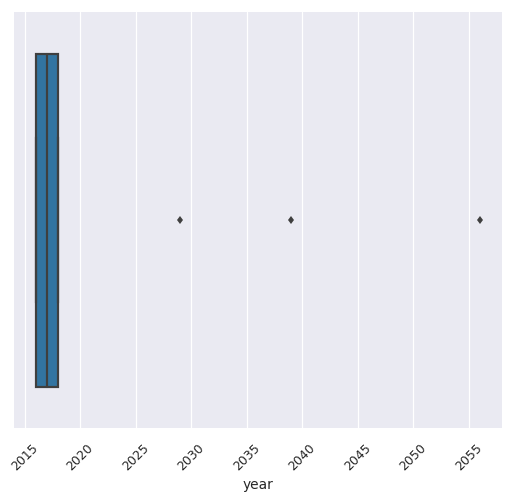

In [47]:
# Checking for outliers
plt.figure(dpi = 90, figsize = (7, 6))
sns.set_style('darkgrid')
sns.boxplot(Fin.year)
plt.xticks(rotation = 45)
plt.show()

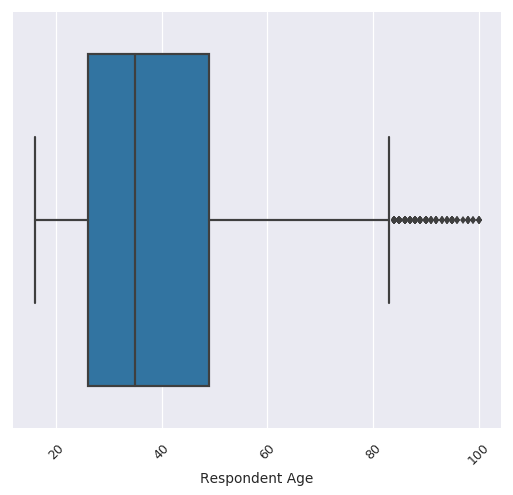

In [48]:
plt.figure(dpi = 90, figsize = (7, 6))
sns.set_style('darkgrid')
sns.boxplot(Fin['Respondent Age'])
plt.xticks(rotation = 45)
plt.show()

# New Section

In [49]:
# Dropping the null values
fin = Fin.dropna()
fin.shape

(23343, 13)

In [0]:
# dropping the uniqueid column due to the high cardinality in it's values
fin = fin.drop(columns = ['uniqueid'])

In [51]:
# Editing the column names
fin.columns = fin.columns.str.lower().str.replace(' ', '_')
fin.columns

Index(['country', 'year', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relathip_with_head', 'marital_status',
       'level_of_educuation', 'type_of_job'],
      dtype='object')

In [52]:
# Dropping the outliers observed in the column year
x = fin[fin['year']>2018].index

fin.drop(x, inplace=True)
fin.year.unique()

array([2018, 2016, 2017])

# New Section

In [0]:
# performing unvariate analysis

In [54]:
fin.groupby('country').household_size.mean()

country
Kenya       3.987133
Rwanda      4.482782
Tanzania    1.931692
Uganda      4.983771
Name: household_size, dtype: float64

In [55]:
fin.groupby('country').household_size.median()

country
Kenya       4.0
Rwanda      4.0
Tanzania    2.0
Uganda      5.0
Name: household_size, dtype: float64

In [56]:
fin.groupby('country').household_size.std()

country
Kenya       2.334967
Rwanda      1.980386
Tanzania    1.055155
Uganda      2.893811
Name: household_size, dtype: float64

In [57]:
fin.groupby('country').household_size.count()

country
Kenya       6062
Rwanda      8683
Tanzania    6500
Uganda      2095
Name: household_size, dtype: int64

# New Section

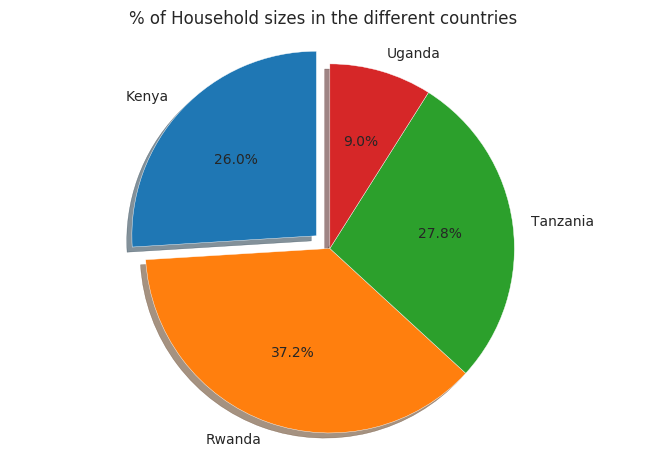

In [58]:
# Distribution of household sizes
country = ['Kenya', 'Rwanda', 'Tanzania', 'Uganda']
household = [6062, 8683, 6500, 2095]
explode = [0.1, 0, 0, 0]
# 
plt.pie(household, labels=country, explode=explode, autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.title('% of Household sizes in the different countries')
plt.show()

# Rwanda has the highest household compared to the other countries with uganda having the lowest no. 

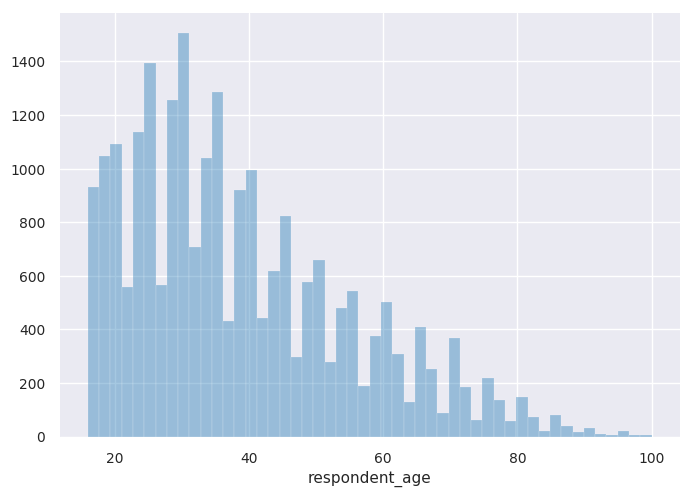

In [59]:
# Plotting a histogram of the respondent's ages
# fin['respondent_age'].hist()
sns.distplot(fin.respondent_age, kde = False)

# New Section

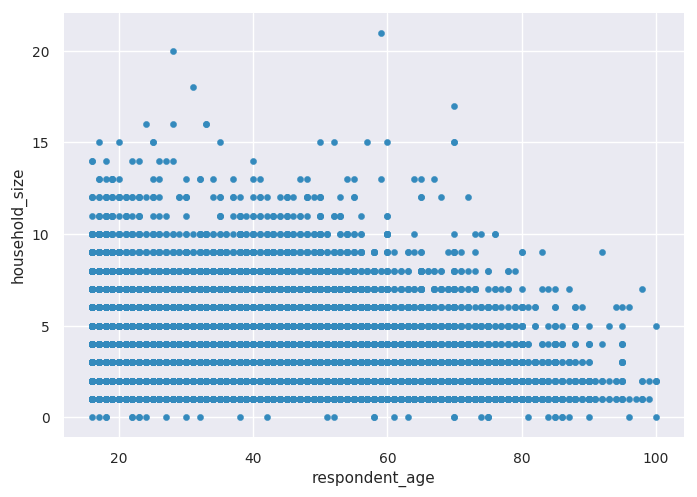

In [81]:
# 
fin.plot(x='respondent_age', y='household_size', kind='scatter')

In [60]:
fin1 = fin.groupby(['gender_of_respondent'])['gender_of_respondent'].count()
fin1

gender_of_respondent
Female    13766
Male       9574
Name: gender_of_respondent, dtype: int64

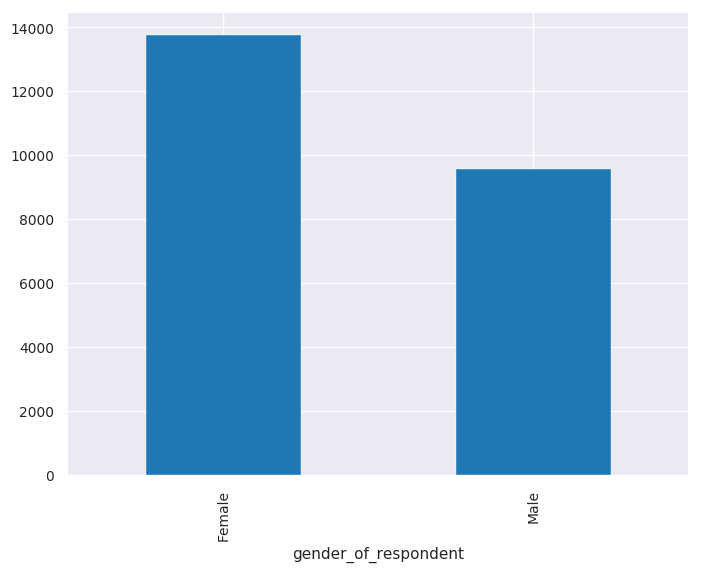

In [61]:
fin1.plot(kind='bar', figsize=(8, 6))
plt.show()

# There were more female respondents than male ones

# New Section

In [0]:
x = fin.drop('has_a_bank_account', 1)
y = fin['has_a_bank_account']

In [63]:
# Encoding the categorical columns
x = pd.get_dummies(x)
x.head()

,year,household_size,respondent_age,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,type_of_location_Rural,type_of_location_Urban,cell_phone_access_No,cell_phone_access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,the_relathip_with_head_Child,the_relathip_with_head_Head of Household,the_relathip_with_head_Other non-relatives,the_relathip_with_head_Other relative,the_relathip_with_head_Parent,the_relathip_with_head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,level_of_educuation_6,level_of_educuation_No formal education,level_of_educuation_Other/Dont know/RTA,level_of_educuation_Primary education,level_of_educuation_Secondary education,level_of_educuation_Tertiary education,level_of_educuation_Vocational/Specialised training,type_of_job_Dont Know/Refuse to answer,type_of_job_Farming and Fishing,type_of_job_Formally employed Government,type_of_job_Formally employed Private,type_of_job_Government Dependent,type_of_job_Informally employed,type_of_job_No Income,type_of_job_Other Income,type_of_job_Remittance Dependent,type_of_job_Self employed
0,2018,3.0,24.0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,2018,5.0,70.0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2018,5.0,26.0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,2018,5.0,34.0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2018,8.0,26.0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [0]:
# Splitting the dataset into the Training set and Test set

#
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [0]:
# Standardizing
# 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [69]:
x_train

array([[ 0.0232953 , -1.17433718,  0.37586905, ..., -0.22160018,
        -0.34761413, -0.61143302],
       [ 0.0232953 , -0.73730484, -0.35120743, ..., -0.22160018,
        -0.34761413,  1.63550211],
       [ 1.20207548,  1.44785689, -0.16943831, ..., -0.22160018,
        -0.34761413,  1.63550211],
       ...,
       [-1.15548487, -0.73730484,  2.49650876, ...,  4.51263165,
        -0.34761413, -0.61143302],
       [-1.15548487,  1.44785689,  0.25468963, ...,  4.51263165,
        -0.34761413, -0.61143302],
       [ 1.20207548,  1.44785689, -0.47238684, ..., -0.22160018,
        -0.34761413, -0.61143302]])

In [70]:
x_test

array([[ 1.20207548, -1.17433718, -0.35120743, ..., -0.22160018,
        -0.34761413, -0.61143302],
       [-1.15548487,  1.01082455, -1.01769419, ..., -0.22160018,
        -0.34761413, -0.61143302],
       [-1.15548487,  0.5737922 , -1.19946331, ..., -0.22160018,
        -0.34761413, -0.61143302],
       ...,
       [-1.15548487, -0.30027249, -1.13887361, ..., -0.22160018,
        -0.34761413, -0.61143302],
       [ 1.20207548,  1.44785689,  1.16353523, ..., -0.22160018,
        -0.34761413, -0.61143302],
       [ 1.20207548, -1.17433718,  2.61768817, ..., -0.22160018,
        -0.34761413, -0.61143302]])

In [73]:
# Applying PCA
from sklearn.decomposition import PCA

pca = PCA(.95)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
x_train

array([[-0.22482777,  2.13920581,  0.66451616, ..., -0.1137306 ,
        -0.01519024,  0.57646328],
       [ 3.38531755, -2.69177387,  0.86333899, ..., -0.1587818 ,
        -0.06145493,  0.22448762],
       [-0.59223634,  1.81241658, -0.88860301, ...,  0.23855451,
         0.0321537 , -0.47805148],
       ...,
       [-1.02698951,  1.1357574 ,  3.72374391, ..., -0.6569727 ,
        -0.46770021,  2.56021084],
       [-2.63710863, -0.03927488, -0.73283394, ..., -0.1566391 ,
        -0.30123859,  0.45754463],
       [-1.51501427, -1.52134305, -1.85497273, ..., -0.47471793,
         0.11713997,  0.57057795]])

In [74]:
# Getting the explained variance ratio

explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.10171163, 0.07253785, 0.06972458, 0.06247519, 0.05166259,
       0.04624466, 0.04015419, 0.03564433, 0.03487714, 0.03116651,
       0.02975091, 0.02710112, 0.02627195, 0.02523953, 0.02503204,
       0.02476803, 0.02467043, 0.024296  , 0.02415896, 0.02392125,
       0.02372821, 0.02327924, 0.02208826, 0.02111412, 0.01971555,
       0.01924303, 0.01542758, 0.01323842])

In [0]:
# PCA Projection

from sklearn.decomposition import PCA

pca = PCA(n_components=23)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [77]:
# Training and Making Predictions.
# 
from sklearn.ensemble import RandomForestClassifier

clas = RandomForestClassifier(max_depth=2, random_state=0)
clas.fit(x_train, y_train)

y_pred = clas.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [78]:
# Performance Evaluation
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

conf = confusion_matrix(y_test, y_pred)
print(conf)

[[4034    2]
 [ 610   22]]


In [79]:
# Performance Evaluation
accuracy_score(y_test, y_pred)

0.8688946015424165

From the classification results as shown in the output, the accuracy, when using the 23 Principal coponent is 86.89%

In [82]:
pca1 = PCA(n_components=1)
x_train = pca1.fit_transform(x_train)
x_test = pca1.transform(x_test)
# 
clas1 = RandomForestClassifier(max_depth=2, random_state=0)
clas1.fit(x_train, y_train)

y_pred = clas1.predict(x_test)
# 
conf1 = confusion_matrix(y_test, y_pred)
print(conf1)
print(accuracy_score(y_test, y_pred))

[[4036    0]
 [ 632    0]]
0.8646101113967438


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


There is no significant reduction observed in the classification accuracy using the 1 pricncipal component as compared to 